In [1]:
import pandas as pd

In [52]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'/content/education_level_region.csv')

# Mean

In [9]:
# Calculatin Mean

# Filter the data for each state and calculate the mean for each education category
for state in df['Geography'].unique():
    state_data = df[df['Geography'] == state]

    # Calculate mean for each education category
    below_secondary_mean = state_data[state_data['Educational attainment level'] == 'Below upper secondary 7'].iloc[:, 2:].mean(numeric_only=True).mean()
    post_secondary_mean = state_data[state_data['Educational attainment level'] == 'Upper secondary and post-secondary non-tertiary'].iloc[:, 2:].mean(numeric_only=True).mean()
    tertiary_mean = state_data[state_data['Educational attainment level'] == 'Tertiary education'].iloc[:, 2:].mean(numeric_only=True).mean()

    # Print mean for each education category
    print(f"Mean for {state}:")
    print(f"Below Upper Secondary 7: {below_secondary_mean:.2f}%")
    print(f"Upper Secondary and Post-Secondary Non-Tertiary: {post_secondary_mean:.2f}%")
    print(f"Tertiary Education: {tertiary_mean:.2f}%")
    print()


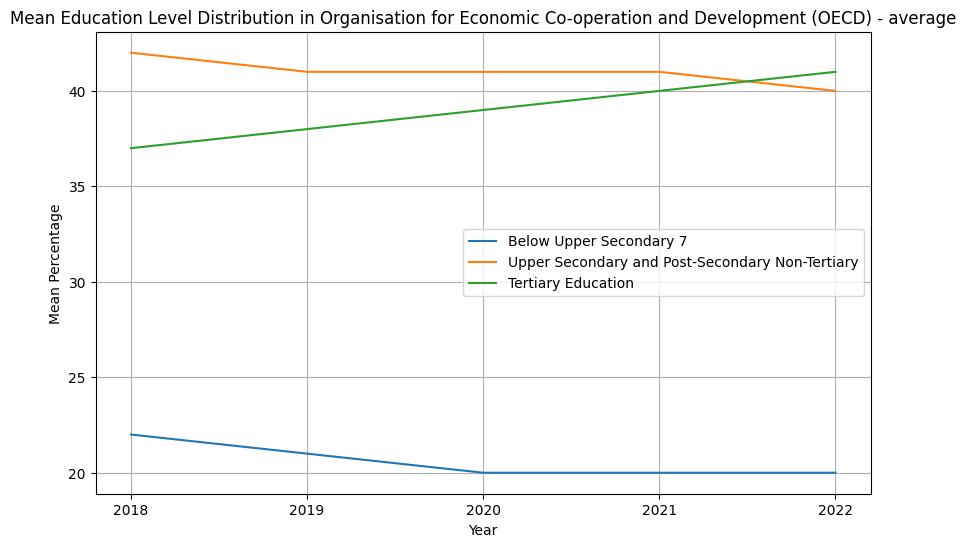

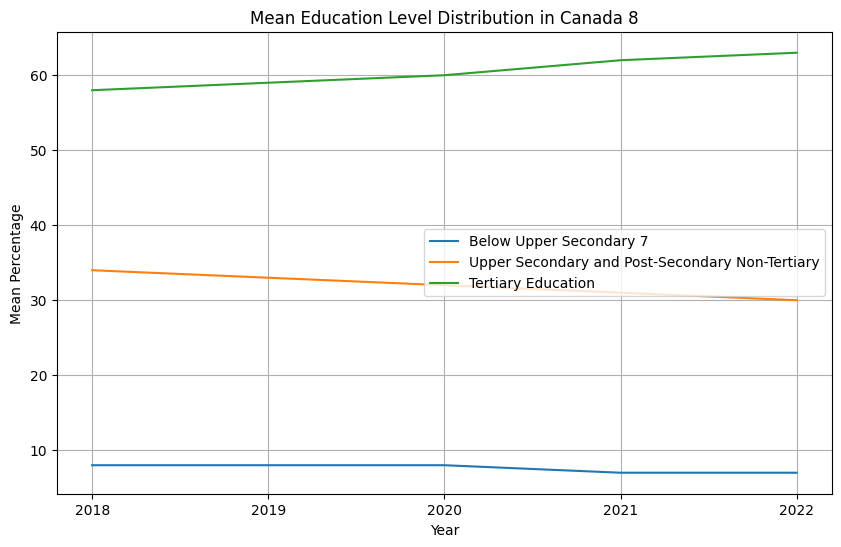

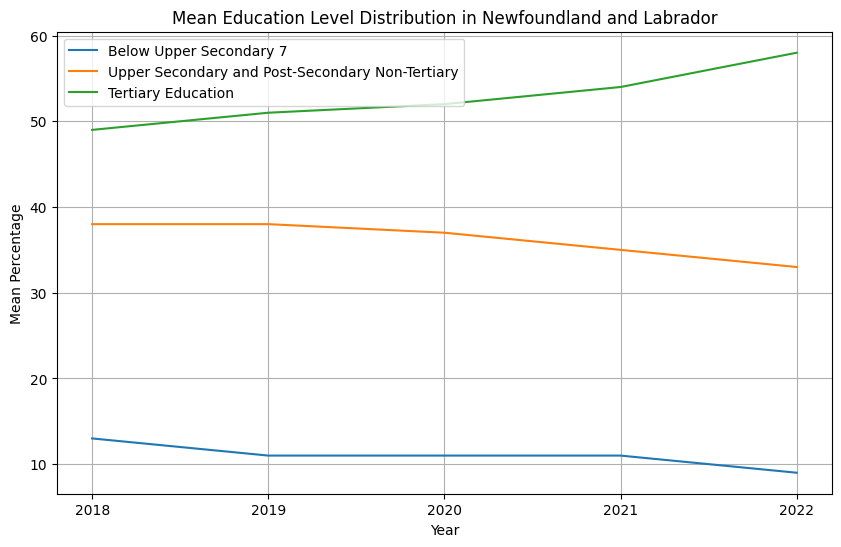

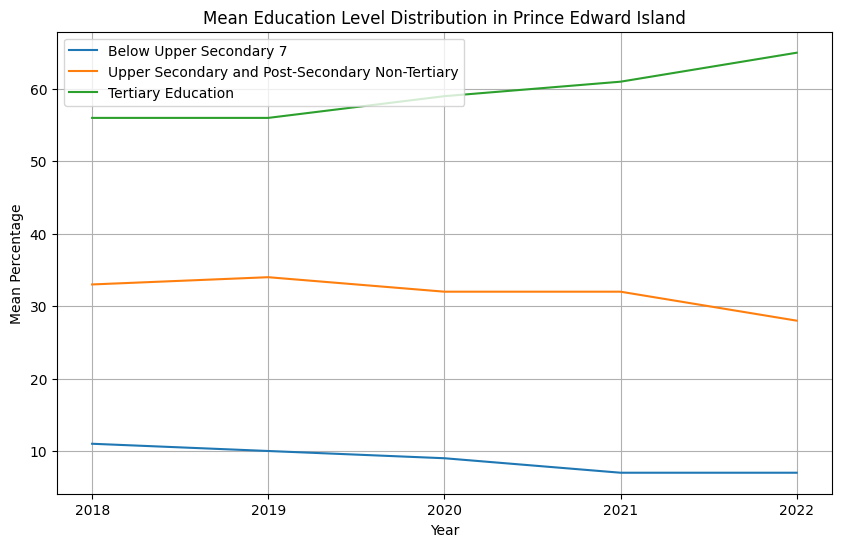

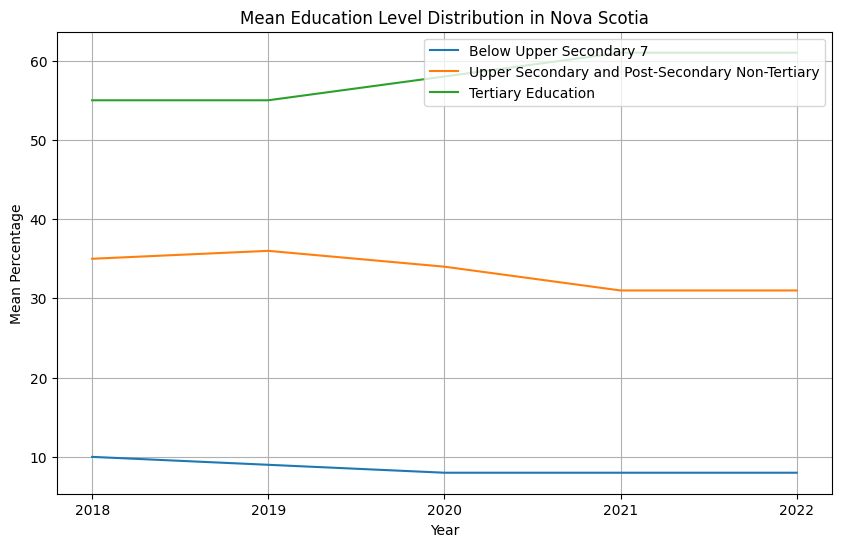

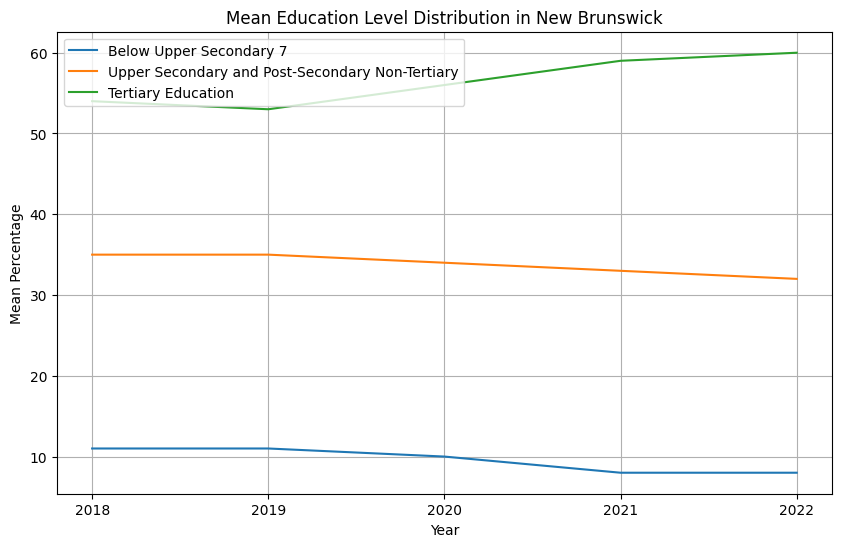

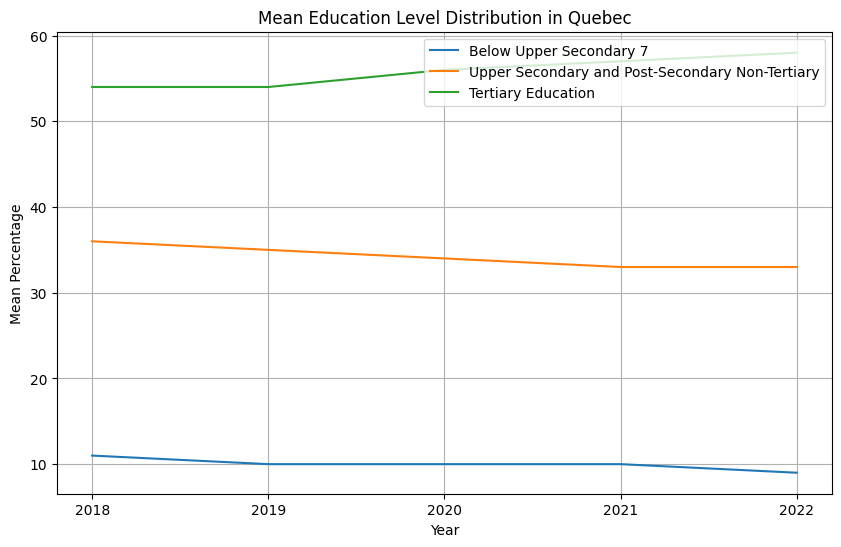

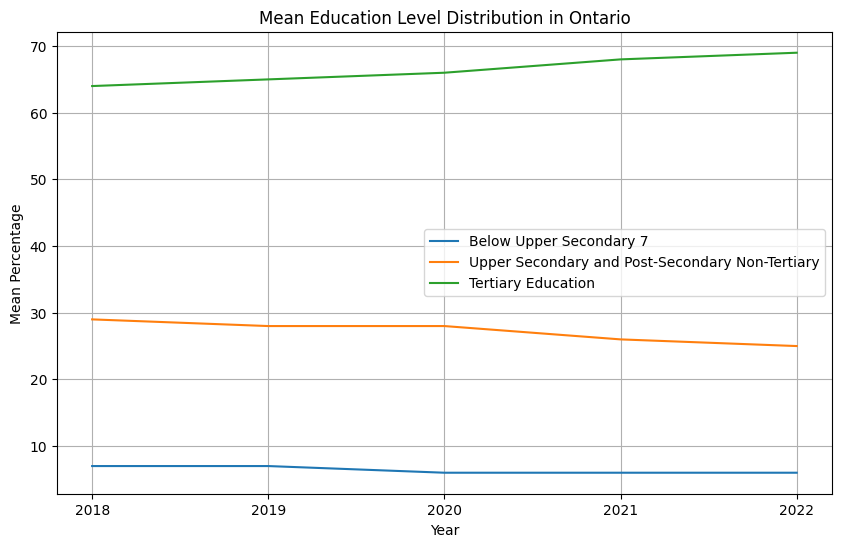

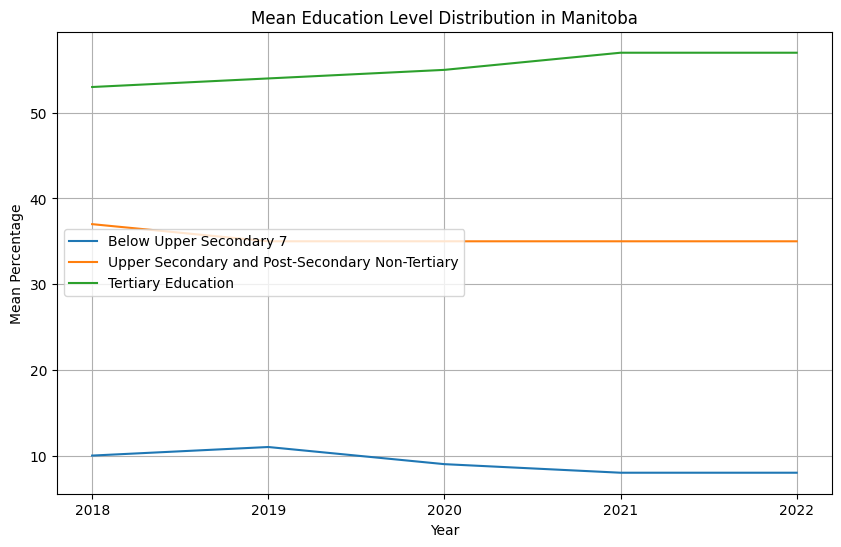

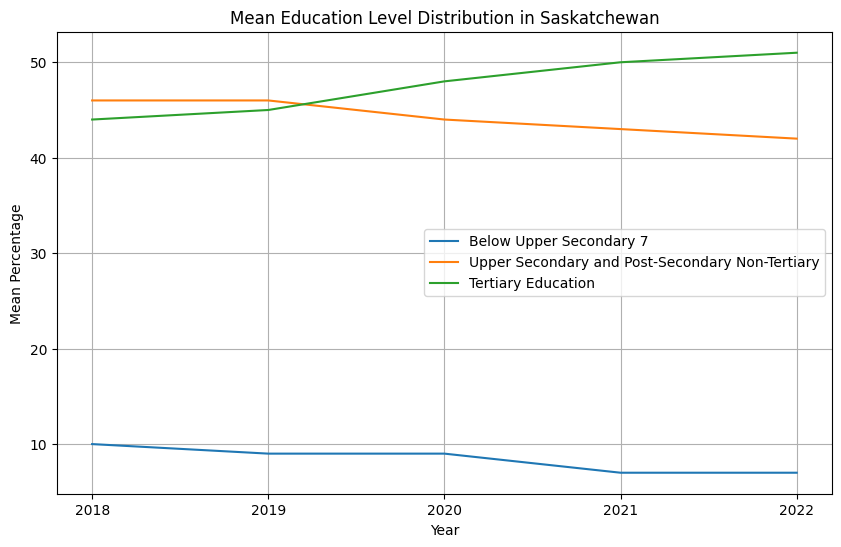

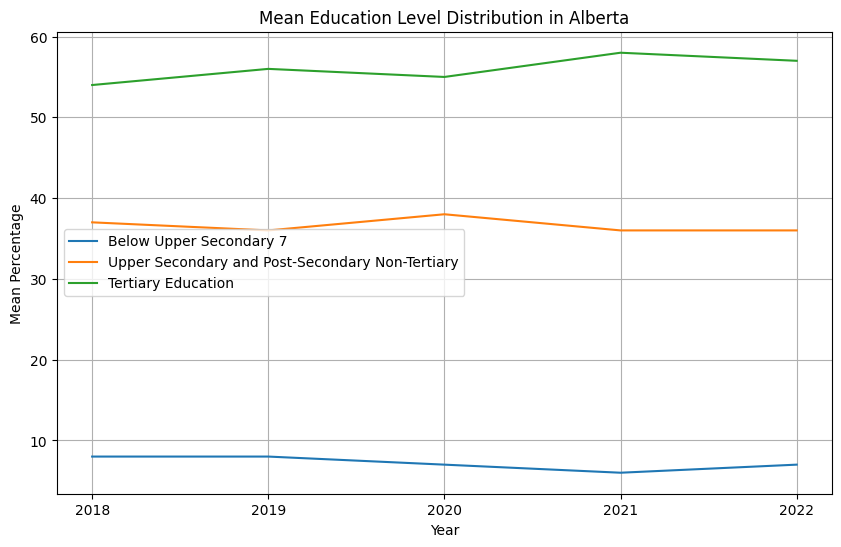

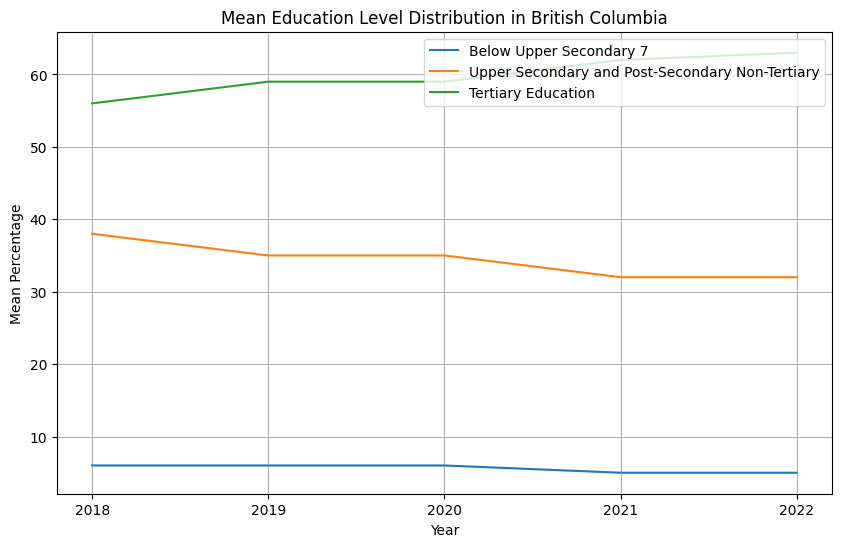

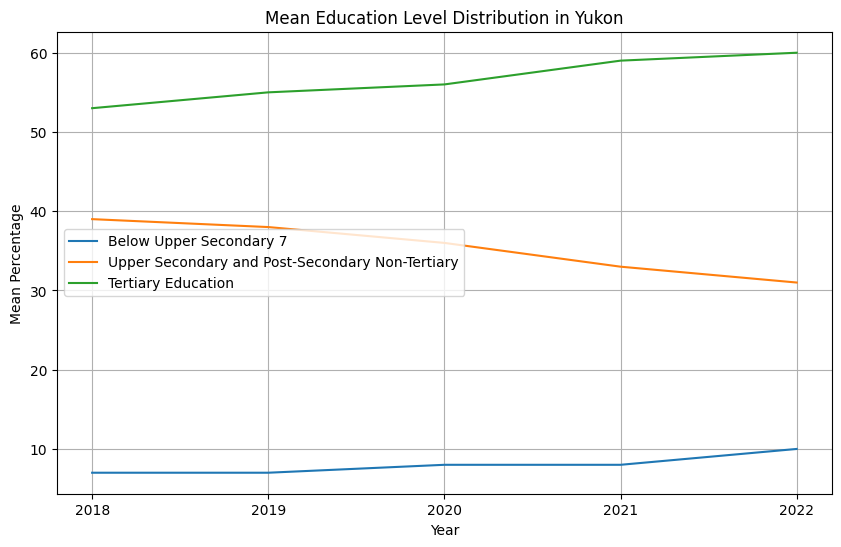

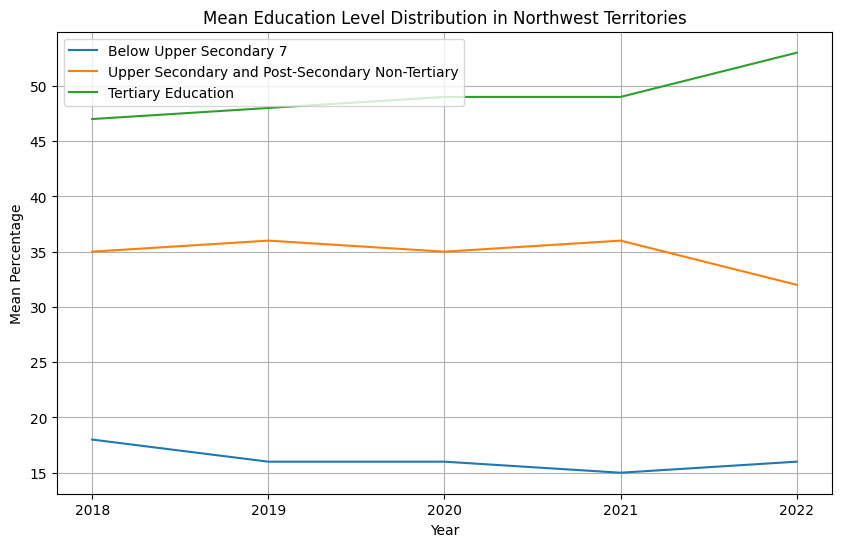

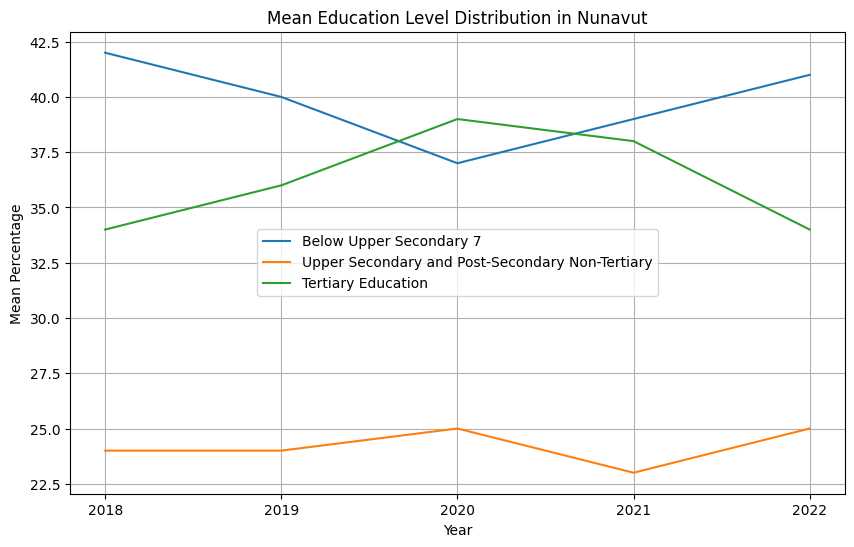

In [51]:
# Ploting graphs

import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for each state and calculate the mean for each education category
for state in df['Geography'].unique():
    state_data = df[df['Geography'] == state]

    # Calculate mean for each education category
    below_secondary_mean = state_data[state_data['Educational attainment level'] == 'Below upper secondary 7'].iloc[:, 2:].mean(numeric_only=True)
    post_secondary_mean = state_data[state_data['Educational attainment level'] == 'Upper secondary and post-secondary non-tertiary'].iloc[:, 2:].mean(numeric_only=True)
    tertiary_mean = state_data[state_data['Educational attainment level'] == 'Tertiary education'].iloc[:, 2:].mean(numeric_only=True)

    # Plot mean data
    plt.figure(figsize=(10, 6))
    plt.plot(below_secondary_mean.index, below_secondary_mean.values, label='Below Upper Secondary 7')
    plt.plot(post_secondary_mean.index, post_secondary_mean.values, label='Upper Secondary and Post-Secondary Non-Tertiary')
    plt.plot(tertiary_mean.index, tertiary_mean.values, label='Tertiary Education')

    # Add labels and title
    plt.title(f"Mean Education Level Distribution in {state}")
    plt.xlabel("Year")
    plt.ylabel("Mean Percentage")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()


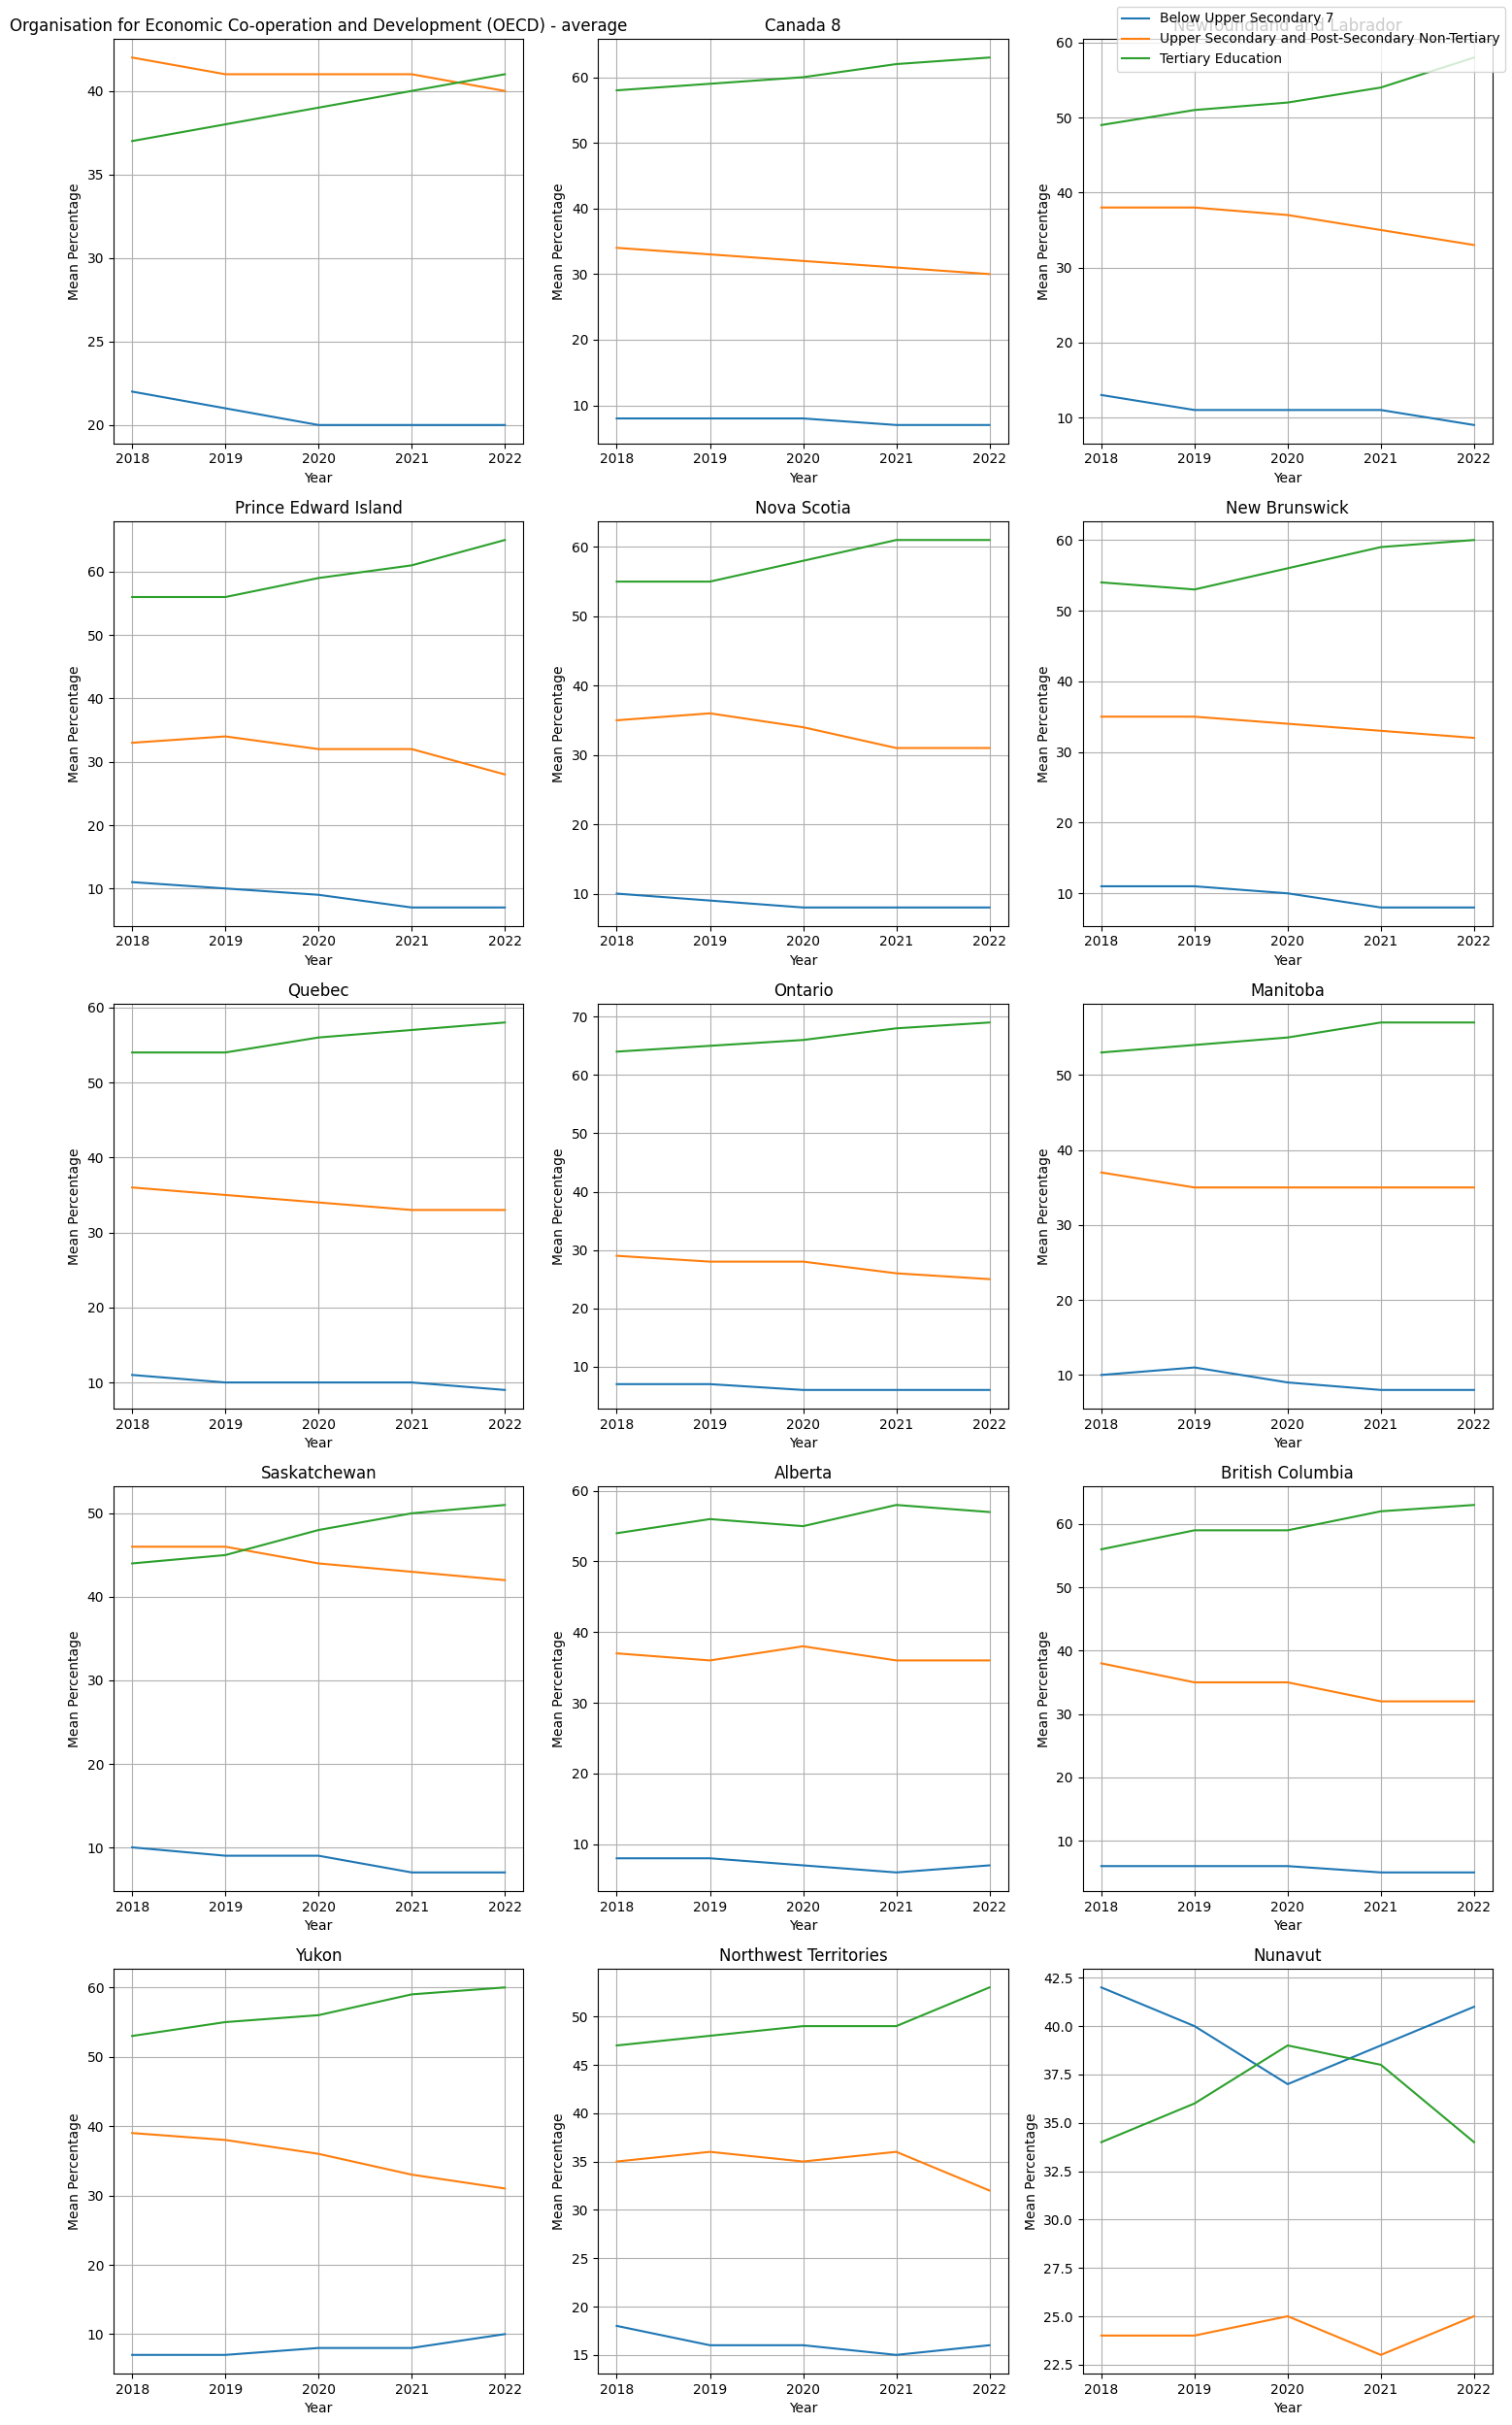

In [55]:
# Plotting Sub Plots for overall view
import pandas as pd
import matplotlib.pyplot as plt

# Get unique states
states = df['Geography'].unique()

# Calculate the number of rows and columns for subplots
num_states = len(states)
num_cols = 3  # Define the number of columns
num_rows = -(-num_states // num_cols)  # Calculate the number of rows required

# Create a figure and axis object
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to iterate over it easily
axs = axs.flatten()

# Initialize handles and labels for legend
handles, labels = None, None

# Filter the data for each state and plot mean data
for i, state in enumerate(states):
    state_data = df[df['Geography'] == state]

    # Calculate mean for each education category
    below_secondary_mean = state_data[state_data['Educational attainment level'] == 'Below upper secondary 7'].iloc[:, 2:].mean(numeric_only=True)
    post_secondary_mean = state_data[state_data['Educational attainment level'] == 'Upper secondary and post-secondary non-tertiary'].iloc[:, 2:].mean(numeric_only=True)
    tertiary_mean = state_data[state_data['Educational attainment level'] == 'Tertiary education'].iloc[:, 2:].mean(numeric_only=True)

    # Plot mean data on corresponding axis
    axs[i].plot(below_secondary_mean.index, below_secondary_mean.values, label='Below Upper Secondary 7')
    axs[i].plot(post_secondary_mean.index, post_secondary_mean.values, label='Upper Secondary and Post-Secondary Non-Tertiary')
    axs[i].plot(tertiary_mean.index, tertiary_mean.values, label='Tertiary Education')

    # Set title and labels
    axs[i].set_title(state)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Mean Percentage")
    axs[i].grid(True)

# Get handles and labels from the last subplot
handles, labels = axs[i].get_legend_handles_labels()

# Add a common legend outside of subplots
fig.legend(handles, labels, loc='upper right')

# Remove extra empty subplots
if num_states < num_rows * num_cols:
    for j in range(num_states, num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# **Correlation Analysis**

In [46]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

          2018      2019      2020      2021      2022
2018  1.000000  0.997824  0.994767  0.989904  0.983482
2019  0.997824  1.000000  0.997144  0.993557  0.986962
2020  0.994767  0.997144  1.000000  0.997496  0.992622
2021  0.989904  0.993557  0.997496  1.000000  0.996421
2022  0.983482  0.986962  0.992622  0.996421  1.000000


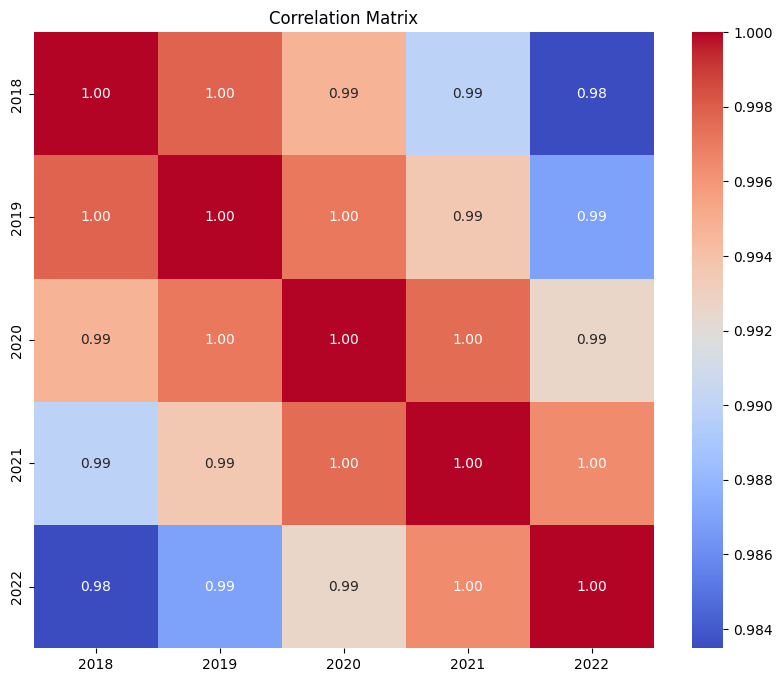

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Conclusion from the correlation analysis:

Here are some conclusions that can be made:

Strong Positive Correlation: The values on the diagonal are all 1.0, indicating a perfect positive correlation (as expected) between a year and itself.

High Positive Correlation between Adjacent Years: The values along the diagonal are very close to 1.0, indicating a strong positive correlation between adjacent years. For example, the correlation between 2018 and 2019 is 0.997824, between 2019 and 2020 is 0.997144, and so on. This suggests that the data from consecutive years is highly positively correlated, meaning they tend to move in the same direction.

Decreasing Correlation with Increasing Time Gap: As we move further away from each year, the correlation decreases slightly. For example, the correlation between 2018 and 2022 is 0.983482, which is slightly lower than the correlation between 2018 and 2019 (0.997824). This suggests that while there is still a strong positive correlation, it weakens slightly as the time gap between the years increases.

Overall Trend Stability: The high correlation values across the board suggest that there is a stable trend in the data over the years. This stability can be useful for forecasting or analyzing trends over time.

These conclusions suggest that the data across the years is highly correlated, with a stable trend and a slight decrease in correlation as the time gap between years increases.

# Clustering

Index(['2018_Below upper secondary 7', '2018_Tertiary education',
       '2018_Upper secondary and post-secondary non-tertiary',
       '2019_Below upper secondary 7', '2019_Tertiary education',
       '2019_Upper secondary and post-secondary non-tertiary',
       '2020_Below upper secondary 7', '2020_Tertiary education',
       '2020_Upper secondary and post-secondary non-tertiary',
       '2021_Below upper secondary 7', '2021_Tertiary education',
       '2021_Upper secondary and post-secondary non-tertiary',
       '2022_Below upper secondary 7', '2022_Tertiary education',
       '2022_Upper secondary and post-secondary non-tertiary'],
      dtype='object')
------------------------------------------------------------


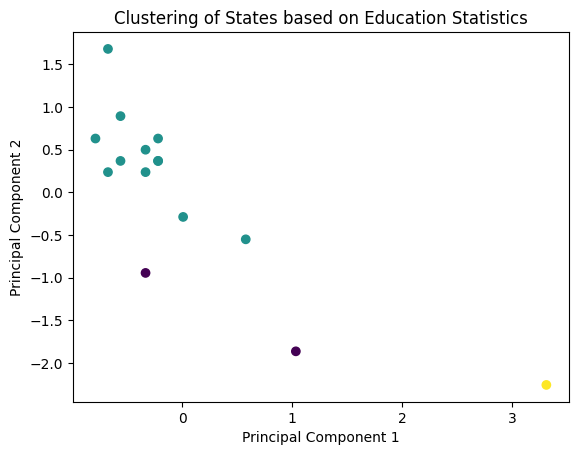

                                                    Cluster
Geography                                                  
Alberta                                                   1
British Columbia                                          1
Canada 8                                                  1
Manitoba                                                  1
New Brunswick                                             1
Newfoundland and Labrador                                 1
Northwest Territories                                     1
Nova Scotia                                               1
Nunavut                                                   2
Ontario                                                   1
Organisation for Economic Co-operation and Deve...        0
Prince Edward Island                                      1
Quebec                                                    1
Saskatchewan                                              0
Yukon                                   

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pivot the data to have states as rows and years as columns
pivot_data = df.pivot(index='Geography', columns='Educational attainment level')

# Drop multi-level index for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]

# Select only the columns containing years (2018, 2019, etc.)
year_columns = [col for col in pivot_data.columns if col.split('_')[0].isdigit()]


# Select data for clustering
X = pivot_data[year_columns]

print(pivot_data.columns)
print("---"*20)


# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters,  n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
pivot_data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of States based on Education Statistics')
plt.show()

# Output the cluster results
print(pivot_data[['Cluster']])


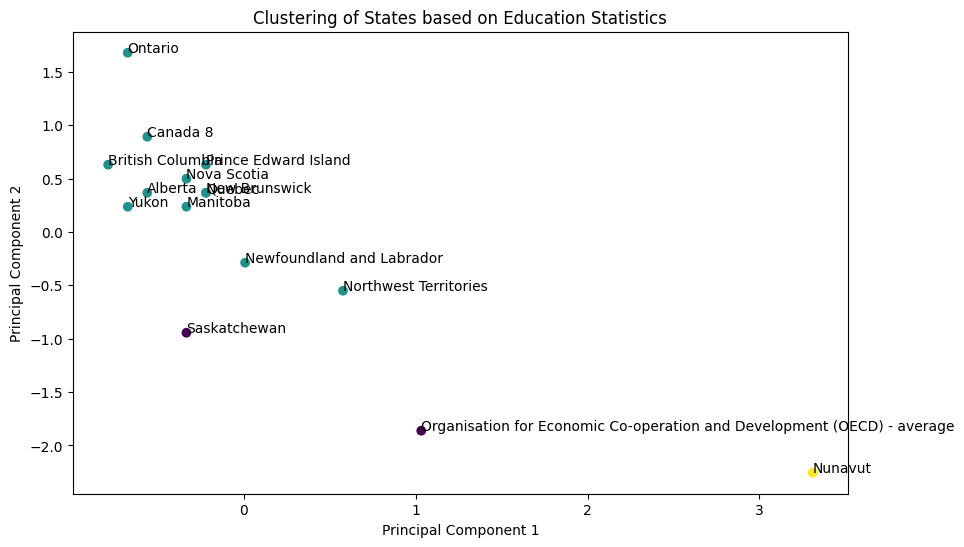

                                                    Cluster
Geography                                                  
Alberta                                                   1
British Columbia                                          1
Canada 8                                                  1
Manitoba                                                  1
New Brunswick                                             1
Newfoundland and Labrador                                 1
Northwest Territories                                     1
Nova Scotia                                               1
Nunavut                                                   2
Ontario                                                   1
Organisation for Economic Co-operation and Deve...        0
Prince Edward Island                                      1
Quebec                                                    1
Saskatchewan                                              0
Yukon                                   

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pivot the data to have states as rows and years as columns
pivot_data = df.pivot(index='Geography', columns='Educational attainment level')

# Drop multi-level index for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]

# Select only the columns containing years (2018, 2019, etc.)
year_columns = [col for col in pivot_data.columns if col.split('_')[0].isdigit()]

# Select data for clustering
X = pivot_data[year_columns]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
pivot_data['Cluster'] = cluster_labels

# Visualize the clusters with state labels
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of States based on Education Statistics')

# Annotate points with state names
for i, state in enumerate(pivot_data.index):
    plt.annotate(state, (X_scaled[i, 0], X_scaled[i, 1]))

plt.show()

# Output the cluster results
print(pivot_data[['Cluster']])


# Time Series Analysis

Geography                    Organisation for Economic Co-operation and Development (OECD) - average  \
Educational attainment level                                                 Below upper secondary 7   
2018                                                                         22                        
2019                                                                         21                        
2020                                                                         20                        
2021                                                                         20                        
2022                                                                         20                        

Geography                                                                     \
Educational attainment level Upper secondary and post-secondary non-tertiary   
2018                                                                      42   
2019                           

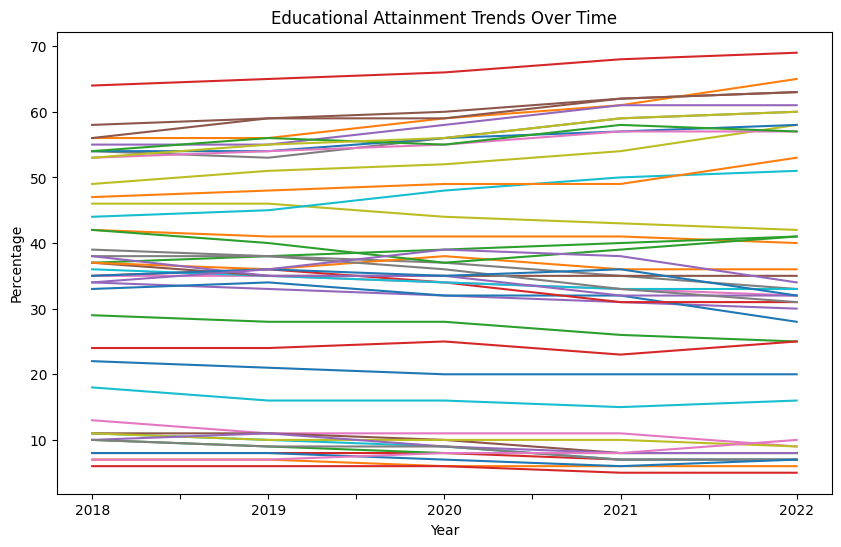

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/education_level_region.csv')
# Set 'Geography' and 'Educational attainment level' as index
df.set_index(['Geography', 'Educational attainment level'], inplace=True)

# Transpose the DataFrame to have years as index
df_transposed = df.T

print(df_transposed)

# Plot the time series data
df_transposed.plot(figsize=(10, 6), legend=False)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Educational Attainment Trends Over Time')
# plt.legend(title='Education Level')
plt.show()



<ipython-input-44-0fecdc8a1dfb>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


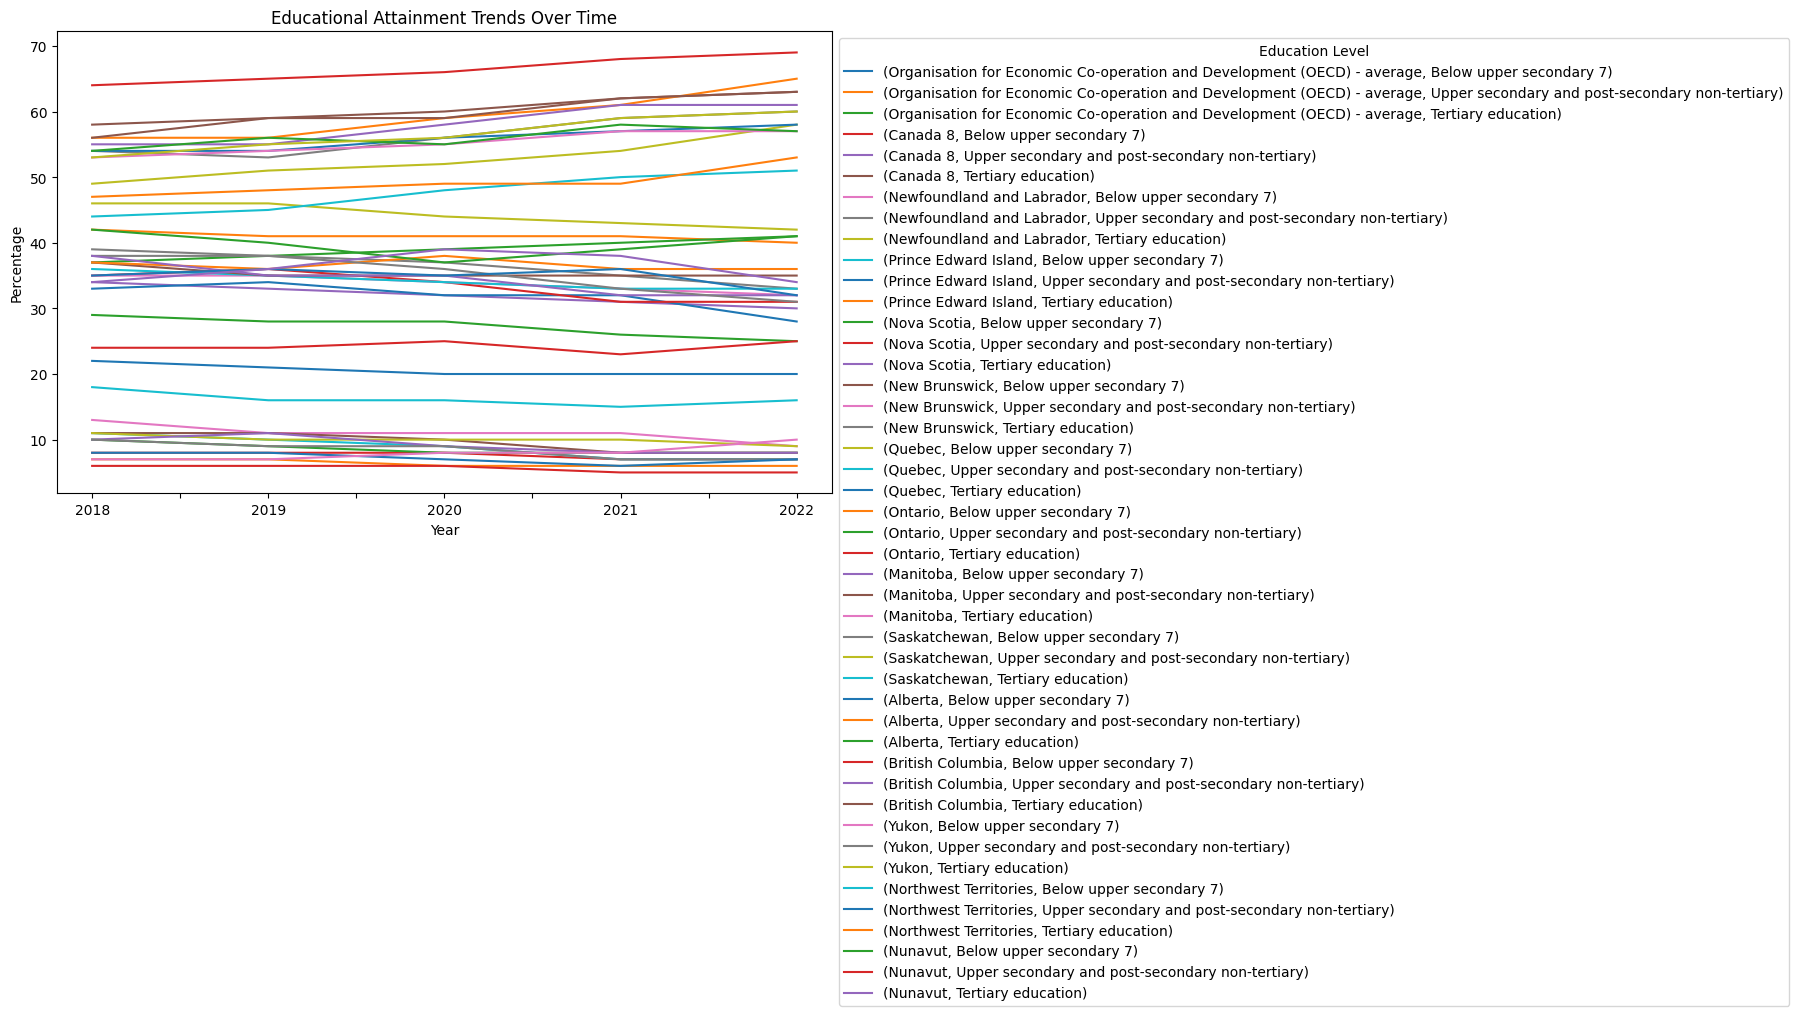

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (assuming the data is already loaded into a DataFrame named df)
# If not, you can create a DataFrame from the provided data

# Plot the time series data
df.T.plot(figsize=(10, 6), legend=False)  # Transpose the DataFrame for plotting
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Educational Attainment Trends Over Time')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
import plotly.express as px

# Read the data (assuming the data is already loaded into a DataFrame named df)
# If not, you can create a DataFrame from the provided data

# Transpose the DataFrame for plotting
df_transposed = df.T.reset_index()

# Melt the DataFrame to have 'Year' and 'Percentage' as columns
df_melted = df_transposed.melt(id_vars=['index'], var_name='Geography', value_name='Percentage')

# Plot the data using Plotly Express
fig = px.line(df_melted, x='index', y='Percentage', color='Geography',
              labels={'index': 'Year', 'Percentage': 'Percentage', 'Geography': 'Geography'},
              title='Educational Attainment Trends Over Time')

# Make the plot interactive
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(hovermode='x')
fig.show()
